# Linear Regression With PyTorch

### About Linear Regression

#### 1. Simple Linear Regression

* Allows us to understand relationship between two continious variables 
* Example
    * x: independent variable
    * y: dependent variable

* $y = \alpha$x +b

#### Simple Example of Linear Regression

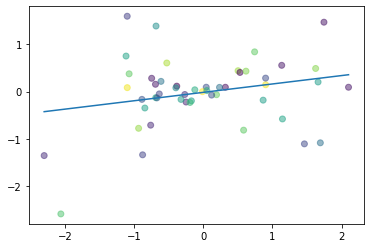

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
uni_x = np.unique(x)
plt.plot( uni_x  ,    np.poly1d(  np.polyfit(x,y,1)  )(uni_x)       )
plt.scatter(x ,y , c=colors , alpha =0.5 )
plt.show()

#### Aim of Linear Regression

* Minimizing the distance between the points and the line (y=ax+b)
* Adjusting
    * Coeffcient : a
    * Bias/Intercept : b
    
#### Building a Linear Regression Model With PyTorch

* Coeffcient :a = 2
* Bias/Intercept :b = 1
* Equation :y = 2x+1


### Building a Toy Dataset 



In [0]:
x_values = [i for i in range(11)]

In [4]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
#convert to numpy array
x_train = np.array(x_values , dtype=np.float32)
x_train.shape

(11,)

In [9]:
# Important : we need to reshape it to 2D

x_train = x_train.reshape(-1,1)
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

Then 

y =2x+1

In [0]:
y_values = [2*i + 1 for i in x_values]

In [11]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [0]:
# with normal python code
y_values = []
for i in x_values:
    result = 2*i+1
    y_values.append(result)

In [13]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [14]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [15]:
# resizing to 2d array
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

In [0]:
from IPython.display import display, Math, Latex

### Building Model

#### Critical Imports


In [0]:
import torch 
import torch.nn as nn 
from torch.autograd import Variable

#### Model 
* 1. Linear Model: y = 2x+1 

* 2. Forward 
    * Example
        - Input x = 1
        - Output y = ?

In [0]:

# create class
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size , output_size)
        # print(input_dim == input_size)
        # self.linear = nn.Linear(input_size , output_size)

    def forward(self,x):
        out =  self.linear(x)
        return out

#### Instantiate Model Class

* Input : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

* desired Output : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21] 

In [0]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim,output_dim)


#### Instantiate Loss Class

* MSE Loss : Mean Squared Error
* MSE  = $\frac{1}{n}\sum^{n}_{i=1}({y_{i}}'-y_{i})$

In [0]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class

* Simplified Equation :$\Theta = \Theta -\eta .*\bigtriangledown _{\Theta }$
    * $\Theta$ : parameter(Our Variables)
    * $\eta$ : learning rate
    * $\bigtriangledown _{\Theta }$ : parameter's gradients
    
* Even Simpler equation:
    * parameters  = parameters-learning_rate * parameter_gradients
    * parameters : a & b in y =  ax+b
    * desired parameter:a=2 & b =1 in y=2x+1

In [0]:
learning_rate = 0.01
#Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

#### Train Model

* 1 epoch : going through the whole x_train data once 
    * 100 epochs : 
        * 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
* Process
    1. Convert input/labels to variables
    2. Clear gradient buffets
    3. Get Output given inputs
    4. Get loss
    5. Get gradient w.r.t to parameters
    6. update parameters using gradients
        * parameters = parameters-learning_rate * parameter_gradients
    7. Repeat

In [0]:
epochs = 100

In [80]:
for epoch in range(epochs):
    epoch += 1
    
    #converting numpy array to Torch Tensor
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #clearing gradient w.r.t variables
    optimizer.zero_grad()
    
    #forward to get outputs
    outputs = model(inputs)
    
    #loss
    loss = criterion(outputs, labels)
    
    # getting gradients w.r.t to parameters
    loss.backward()
    
    #updating parameters
    optimizer.step()
    
    # print('epoch {}, losss {}'.format(epoch,loss.data[0]))
    print('epoch {}, losss {}'.format(epoch,loss.data.item()))
    
    

                  

epoch 1, losss 0.00298058008775115
epoch 2, losss 0.0029473071917891502
epoch 3, losss 0.0029143900610506535
epoch 4, losss 0.0028818228747695684
epoch 5, losss 0.002849664306268096
epoch 6, losss 0.0028178321663290262
epoch 7, losss 0.002786380937322974
epoch 8, losss 0.0027552731335163116
epoch 9, losss 0.002724476158618927
epoch 10, losss 0.002694085007533431
epoch 11, losss 0.0026640049181878567
epoch 12, losss 0.0026342275086790323
epoch 13, losss 0.0026048060972243547
epoch 14, losss 0.002575716469436884
epoch 15, losss 0.0025469576939940453
epoch 16, losss 0.0025185158010572195
epoch 17, losss 0.002490412211045623
epoch 18, losss 0.0024626096710562706
epoch 19, losss 0.0024350991006940603
epoch 20, losss 0.002407911466434598
epoch 21, losss 0.0023810332641005516
epoch 22, losss 0.0023544307332485914
epoch 23, losss 0.0023281360045075417
epoch 24, losss 0.002302136505022645
epoch 25, losss 0.002276418264955282
epoch 26, losss 0.0022509852424263954
epoch 27, losss 0.00222586677409

#### Compare Data

In [81]:
# Purely inference
# 2x+1 of (0,1,2,3,4,5,6,7,8,9)
predicted = model(Variable(torch.from_numpy(x_train)))
predicted = predicted.data.numpy()
predicted

array([[ 0.94174945],
       [ 2.950138  ],
       [ 4.9585266 ],
       [ 6.966915  ],
       [ 8.975304  ],
       [10.983692  ],
       [12.992081  ],
       [15.000469  ],
       [17.008858  ],
       [19.017246  ],
       [21.025635  ]], dtype=float32)

In [82]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### Graph Plot 



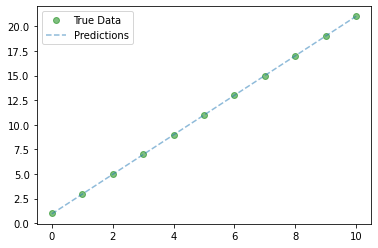

In [83]:
#clear figure
plt.clf()

#get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

#plot the true data
plt.plot(x_train,y_train,'go',label='True Data',alpha=0.5)

#plot predictions
plt.plot(x_train,predicted,'--',label='Predictions',alpha=0.5)

#Legend & Plot
plt.legend(loc='best')
plt.show()

